In [1]:
import numpy as np
import scipy.signal as sig
import soundfile as sf
from matplotlib import pyplot as plt

import IPython.display as ipd

In [83]:
def genSine(f, dur, fs):
    output = np.zeros(int(dur*fs))
    phase = 0.0
    
    for i in range(int(dur*fs)):
        output[i] = np.sin(phase)
        
        phase += 2 * np.pi * f / fs
        phase = phase % (2 * np.pi)
        
    return output

def genSquare(f, dur, fs):
    output = np.zeros(int(dur*fs))
    phase = 0.0
    for i in range(int(dur*fs)):
        if phase <= np.pi:
            output[i] = 1
        else:
            output[i] = -1
        
        phase += 2 * np.pi * f / fs
        phase = phase % (2 * np.pi)
        
    return output

def genSaw(f, dur, fs):
    output = np.zeros(int(dur*fs))
    phase = 0.0
    for i in range(int(dur*fs)):
        output[i] = (phase/np.pi)-1
        
        phase += 2 * np.pi * f / fs
        phase = phase % (2 * np.pi)
        
    return output

def genTri(f, dur, fs):
    output = np.zeros(int(dur*fs))
    output = np.zeros(int(dur*fs))
    phase = 0.0
    for i in range(int(dur*fs)):
        if phase <= np.pi/2:
            output[i] = 2*phase/np.pi
        elif np.pi/2 < phase < 3*np.pi/2:
            output[i] = 2 - (2*phase/np.pi)
        elif phase > 3*np.pi/2:
            output[i] = -4 + (2*phase/np.pi)
        
        phase += 2 * np.pi * f / fs
        phase = phase % (2 * np.pi)
        
    return output

In [74]:
def plot_waveform (wave):
    plt.figure(figsize=(5, 3))
    plt.plot(wave[:400])
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.show()
    
    plt.figure(figsize=(5, 3))
    dft = np.fft.fft(wave)
    freq_axis = np.fft.fftfreq(len(wave), d=1/44100)
    plt.plot(freq_axis, np.abs(dft))
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show


In [88]:
sine_wave_441 = genSine (441, 1, 44100)
ipd.Audio(data = sine_wave_441, rate = 44100)

In [89]:
sine_wave_450 = genSine (450, 1, 44100)
ipd.Audio(data = sine_wave_450, rate = 44100)

In [90]:
sine_wave_3000 = genSine (3000, 1, 44100)
ipd.Audio(data = sine_wave_3000, rate = 44100)

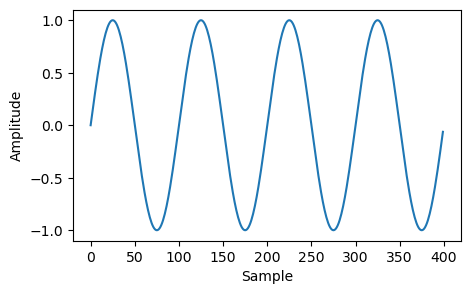

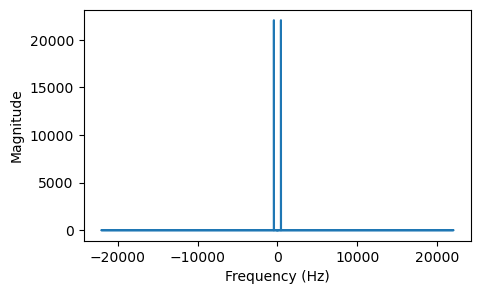

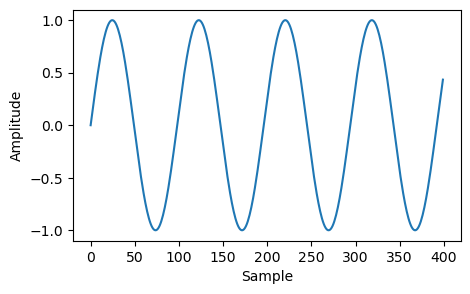

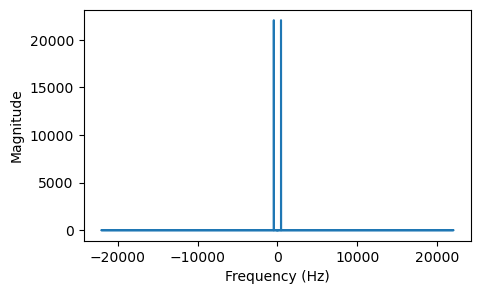

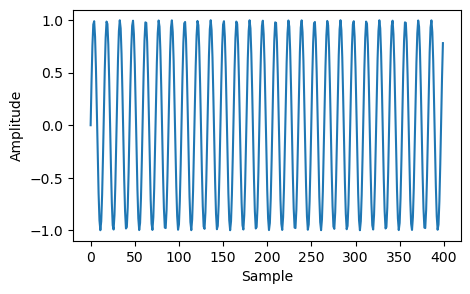

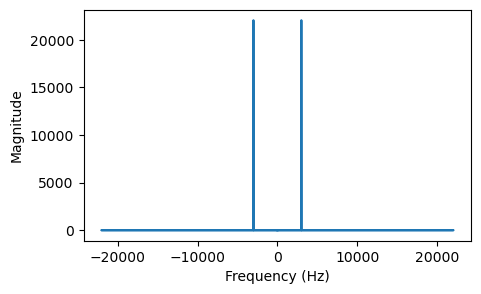

In [91]:
plot_waveform(sine_wave_441)
plot_waveform(sine_wave_450)
plot_waveform(sine_wave_3000)

In [78]:
square_wave_441 = genSquare (441, 1, 44100)
ipd.Audio(data = square_wave_441, rate = 44100)

In [79]:
square_wave_450 = genSquare (450, 1, 44100)
ipd.Audio(data = square_wave_450, rate = 44100)

In [80]:
square_wave_3000 = genSquare (3000, 1, 44100)
ipd.Audio(data = square_wave_3000, rate = 44100)

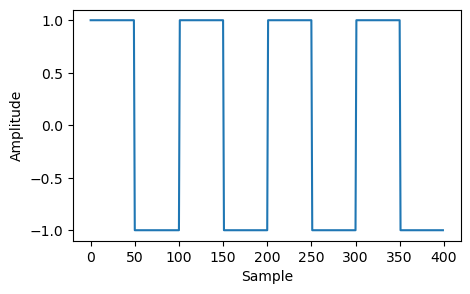

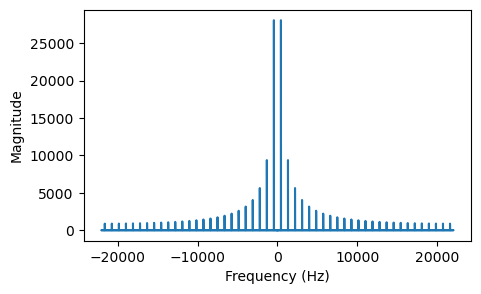

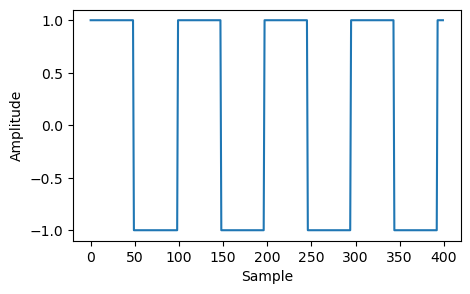

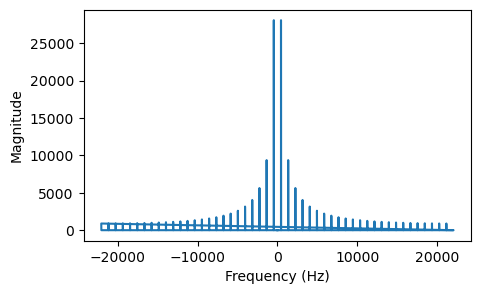

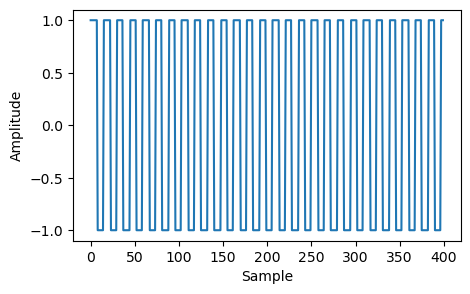

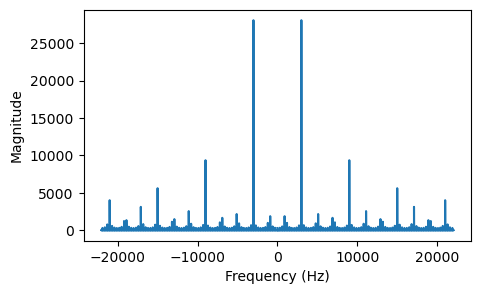

In [81]:
plot_waveform(square_wave_441)
plot_waveform(square_wave_450)
plot_waveform(square_wave_3000)

In [69]:
saw_wave_441 = genSaw (441, 1, 44100)
ipd.Audio(data = saw_wave_441, rate = 44100)

In [70]:
saw_wave_450 = genSaw (450, 1, 44100)
ipd.Audio(data = saw_wave_450, rate = 44100)

In [77]:
saw_wave_3000 = genSaw (3000, 1, 44100)
ipd.Audio(data = saw_wave_3000, rate = 44100)

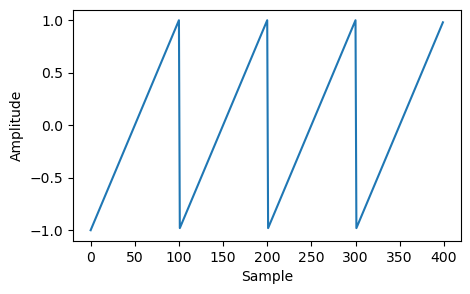

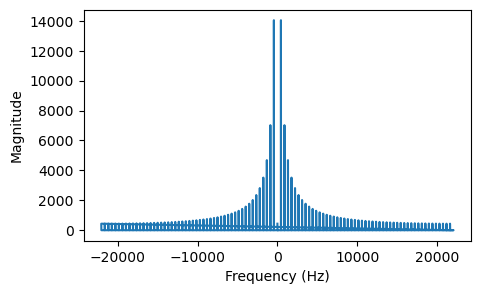

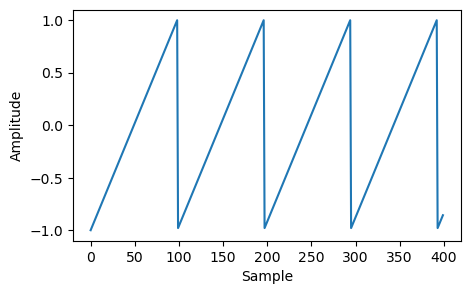

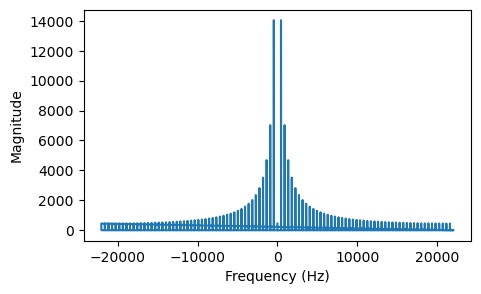

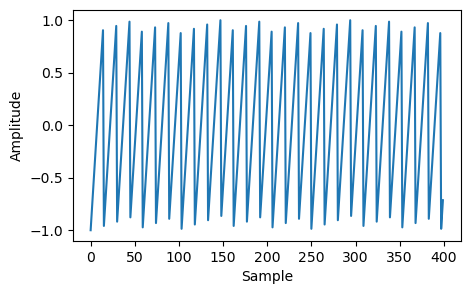

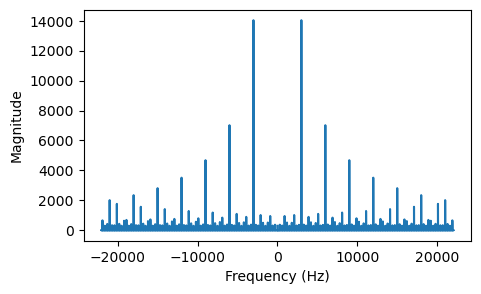

In [75]:
plot_waveform(saw_wave_441)
plot_waveform(saw_wave_450)
plot_waveform(saw_wave_3000)

In [84]:
tri_wave_441 = genTri (441, 1, 44100)
ipd.Audio(data = tri_wave_441, rate = 44100)

In [85]:
tri_wave_450 = genTri (450, 1, 44100)
ipd.Audio(data = tri_wave_450, rate = 44100)

In [86]:
tri_wave_3000 = genTri (3000, 1, 44100)
ipd.Audio(data = tri_wave_3000, rate = 44100)

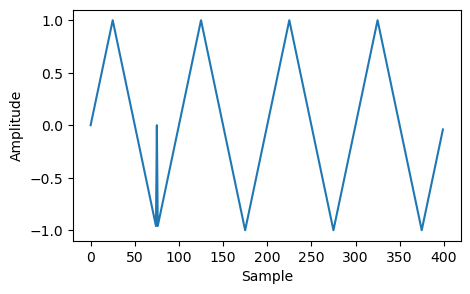

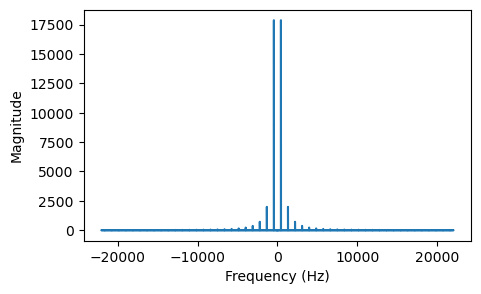

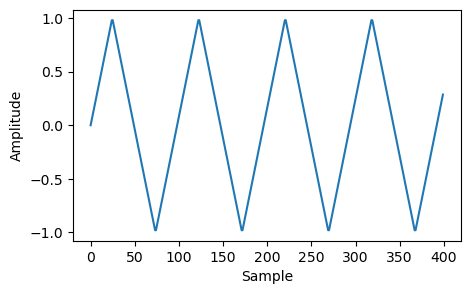

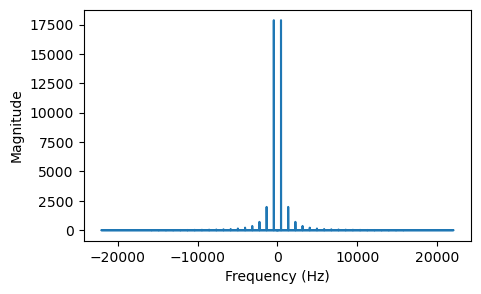

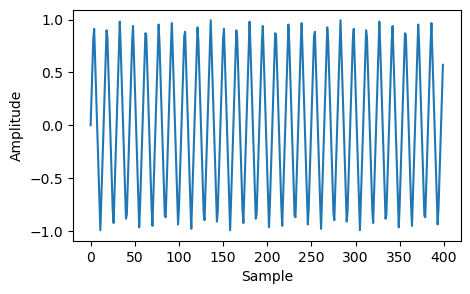

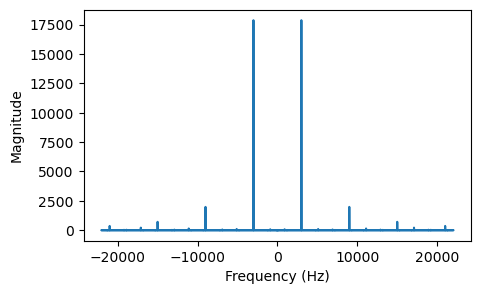

In [87]:
plot_waveform(tri_wave_441)
plot_waveform(tri_wave_450)
plot_waveform(tri_wave_3000)

In [24]:
def genBLSquare(f, dur, fs):
    output = np.zeros(int(dur*fs))
    t = np.linspace(0, dur, int(dur * fs))
    
    for k in range(1, int(fs / (2 * f)) + 1, 2):
        output += (1 / k) * np.sin(2 * np.pi * f * k * t)

    output *= 4 / np.pi
    return output

def genBLSaw(f, dur, fs):
    output = np.zeros(int(dur*fs))
    t = np.linspace(0, dur, int(dur * fs))
    
    for k in range(1, int(fs / (2 * f)) + 1):
        output += (1 / k) * np.sin(2 * np.pi * f * k * t)

    output *= -2 / np.pi
    return output

def genBLTri(f, dur, fs):
    output = np.zeros(int(dur*fs))
    t = np.linspace(0, dur, int(dur * fs))
    
    for k in range(1, int(fs / (2 * f)) + 1, 2):
        output += ((-1**((k-1)/2))/(k**2)) * np.sin(2 * np.pi * f * k * t)

    output *= 8/ (np.pi**2)
    return output

In [92]:
BLsquare_wave_441 = genBLSquare (441, 1, 44100)
ipd.Audio(data = BLsquare_wave_441, rate = 44100)

In [94]:
BLsquare_wave_450 = genBLSquare (450, 1, 44100)
ipd.Audio(data = BLsquare_wave_450, rate = 44100)

In [95]:
BLsquare_wave_3000 = genBLSquare (3000, 1, 44100)
ipd.Audio(data = BLsquare_wave_3000, rate = 44100)

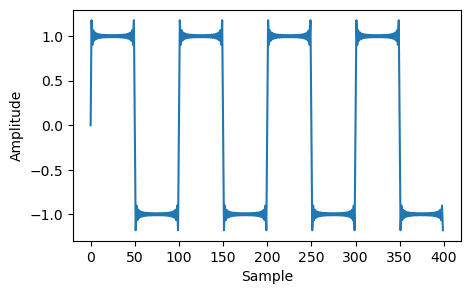

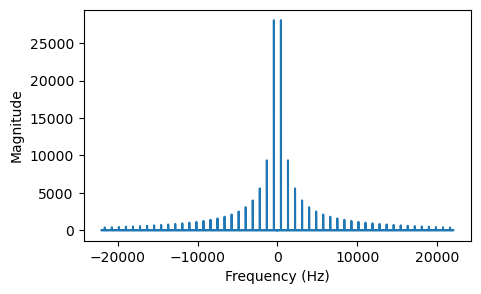

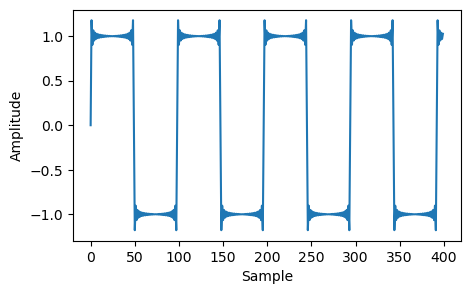

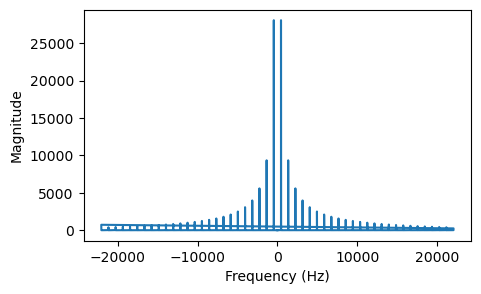

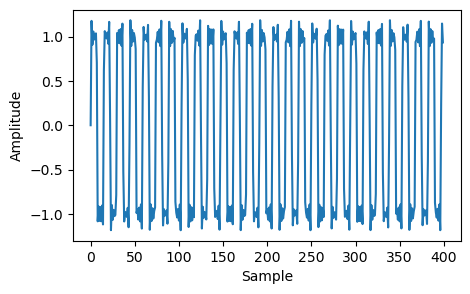

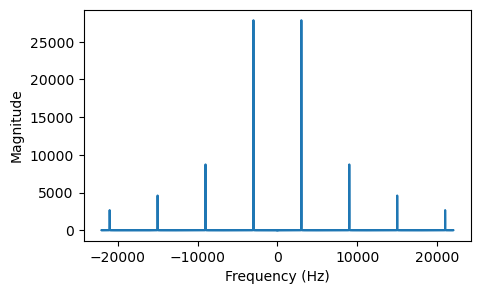

In [96]:
plot_waveform(BLsquare_wave_441)
plot_waveform(BLsquare_wave_450)
plot_waveform(BLsquare_wave_3000)

In [97]:
BLsaw_wave_441 = genBLSaw (441, 1, 44100)
ipd.Audio(data = BLsaw_wave_441, rate = 44100)

In [98]:
BLsaw_wave_450 = genBLSaw (450, 1, 44100)
ipd.Audio(data = BLsaw_wave_450, rate = 44100)

In [99]:
BLsaw_wave_3000 = genBLSaw (3000, 1, 44100)
ipd.Audio(data = BLsaw_wave_3000, rate = 44100)

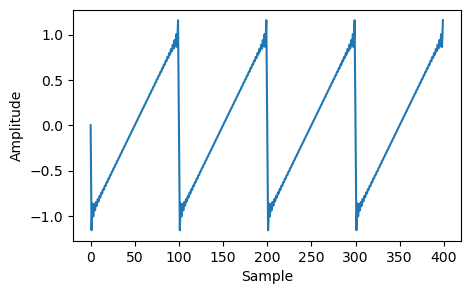

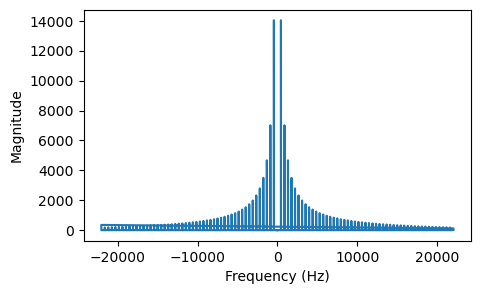

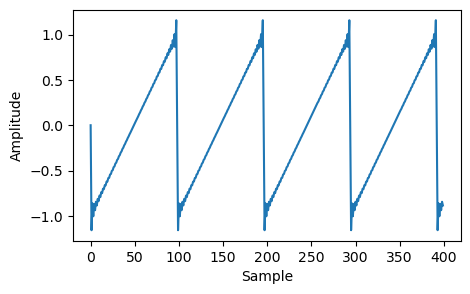

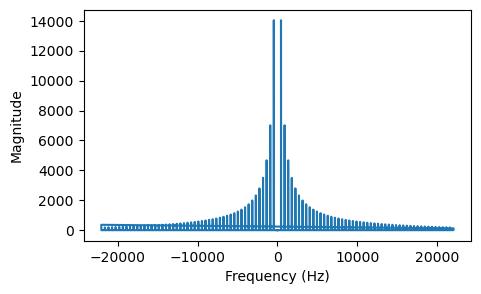

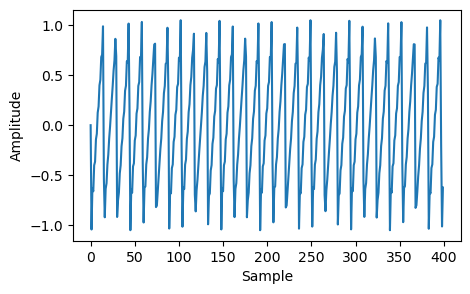

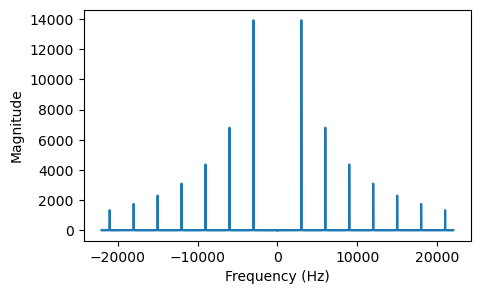

In [100]:
plot_waveform(BLsaw_wave_441)
plot_waveform(BLsaw_wave_450)
plot_waveform(BLsaw_wave_3000)

In [101]:
BLtri_wave_441 = genBLTri (441, 1, 44100)
ipd.Audio(data = BLtri_wave_441, rate = 44100)

In [102]:
BLtri_wave_450 = genBLTri (450, 1, 44100)
ipd.Audio(data = BLtri_wave_450, rate = 44100)

In [103]:
BLtri_wave_3000 = genBLTri (3000, 1, 44100)
ipd.Audio(data = BLtri_wave_3000, rate = 44100)

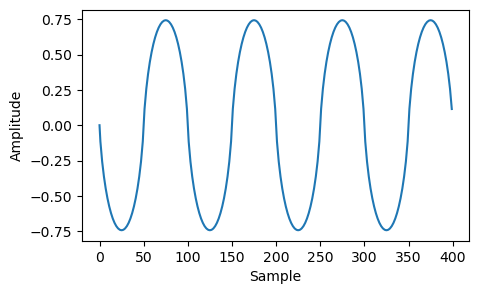

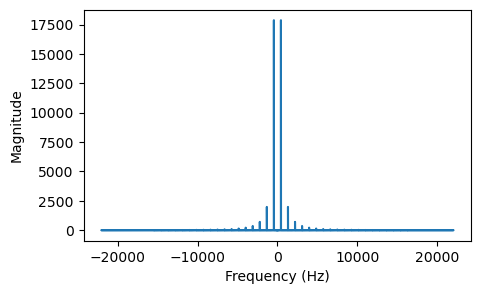

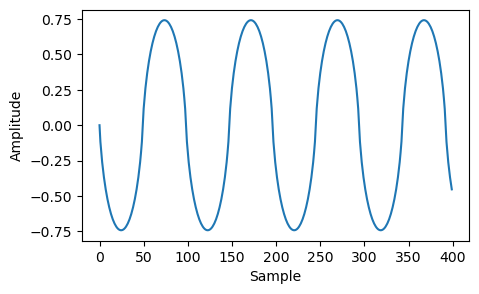

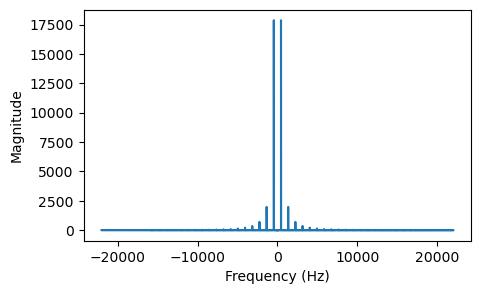

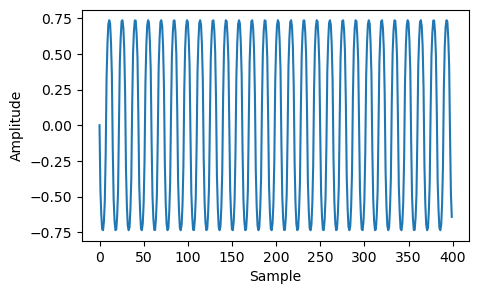

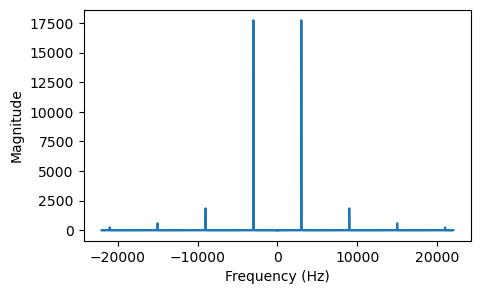

In [104]:
plot_waveform(BLtri_wave_441)
plot_waveform(BLtri_wave_450)
plot_waveform(BLtri_wave_3000)

In [34]:
def compute_adsr(a=10., d=10., s_time=30., s_lev=0.5, r=10., fs=44100):
    '''
    computes the amplitude envelope for an ADSR envelope
    a, d, s_time, and r are given in ms
    s_lev is givin as a linear amplitude
    '''
    a = int(a*fs/1000)
    d = int(d*fs/1000)
    s_time = int(s_time*fs/1000)
    r = int(r*fs/1000)

    #TODO: modify these lines
    aseg = np.linspace(0, 1, a)
    dseg = np.linspace(1, s_lev, d)
    sseg = np.ones(s_time) * s_lev
    rseg = np.linspace(s_lev, 0, r)
    
    max_samples = max(a + d + s_time + r, 1)
    adsr = np.concatenate((aseg, dseg, sseg, rseg))
    adsr = np.resize(adsr, max_samples)
    return adsr

In [115]:
#PERCUSSIVE SOUND
envelope = compute_adsr(a=5, d=1, s_time=1, s_lev=0.99, r=100, fs=44100)

In [120]:
BLsquare_wave_500 = genBLSquare (500, 1, 44100)
BLsquare_wave_500 = np.resize(BLsquare_wave_500, len(envelope))
percussive_sound = BLsquare_wave_500 * envelope

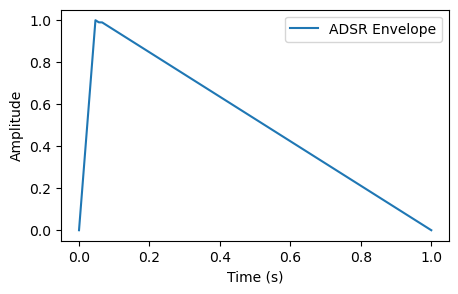

In [121]:
plt.figure(figsize=(5, 3))
t = np.linspace(0, duration, len(envelope))
plt.plot(t, envelope, label='ADSR Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [122]:
ipd.Audio(data = percussive_sound, rate = 44100)

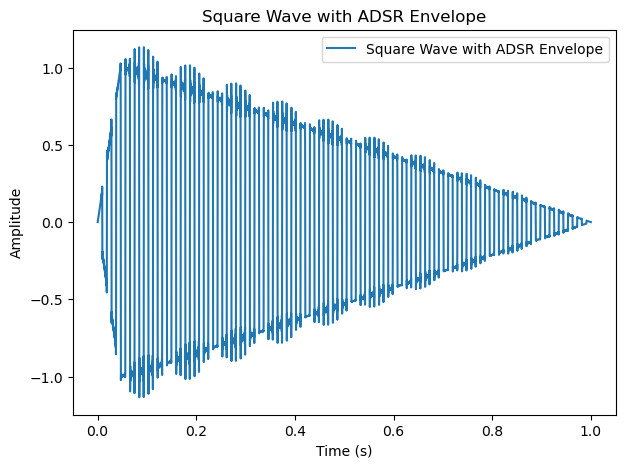

In [123]:
plt.figure(figsize=(7, 5))
t = np.linspace(0, duration, len(envelope))
plt.plot(t, percussive_sound, label='Square Wave with ADSR Envelope')
plt.title('Square Wave with ADSR Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [126]:
#SYNTH PAD SOUND
envelope = compute_adsr(a=100, d=5, s_time=50, s_lev=0.8, r=10, fs=44100)

In [127]:
BLtri_wave_500 = genBLTri (500, 1, 44100)
BLtri_wave_500 = np.resize(BLtri_wave_500, len(envelope))
BLtri_wave_500point6 = genBLTri (500.6, 1, 44100)
BLtri_wave_500point6 = np.resize(BLtri_wave_500point6, len(envelope))
synth_pad = BLtri_wave_500 + BLtri_wave_500point6
synth_pad = synth_pad * envelope

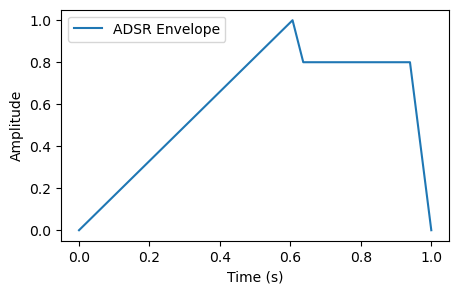

In [128]:
plt.figure(figsize=(5, 3))
t = np.linspace(0, duration, len(envelope))
plt.plot(t, envelope, label='ADSR Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [129]:
ipd.Audio(data = synth_pad, rate = 44100)

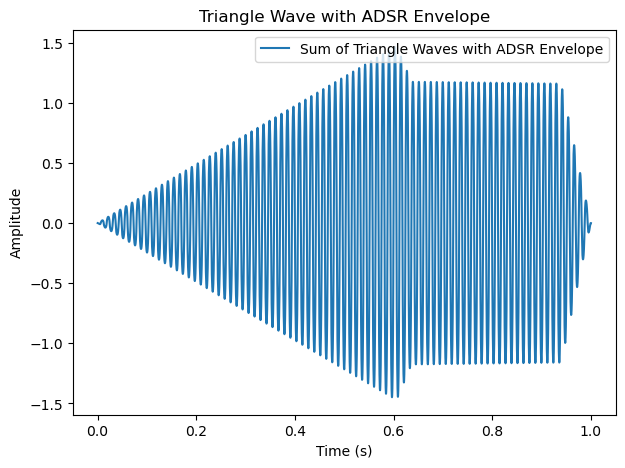

In [130]:
plt.figure(figsize=(7, 5))
t = np.linspace(0, duration, len(envelope))
plt.plot(t, synth_pad, label='Sum of Triangle Waves with ADSR Envelope')
plt.title('Triangle Wave with ADSR Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()